In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('F:column_2C_weka.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
data= pd.read_csv("F:column_2C_weka.csv")

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [43]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


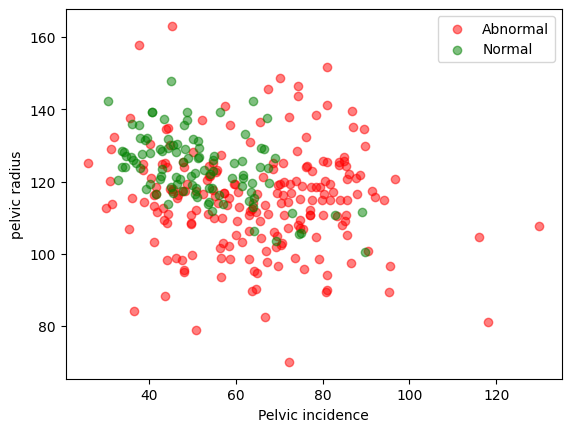

In [44]:
normal = data[data["class"]=="Normal"]
abnormal = data[data["class"]=="Abnormal"]

plt.scatter(abnormal.pelvic_incidence,abnormal.pelvic_radius,color = "red",label ="Abnormal",alpha = 0.5)
plt.scatter(normal.pelvic_incidence,normal.pelvic_radius,color="green",label = "Normal",alpha=0.5)
plt.xlabel("Pelvic incidence")
plt.ylabel("pelvic radius")
plt.legend()
plt.show()

In [45]:
#%% Converting class values to numeric
#   Normal -> 0
#   Abnormal ->1

data["class"] = [1 if i=="Normal" else 0 for i in data["class"]]

In [46]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

In [47]:
#%% Normalization
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=40,test_size=0.25)

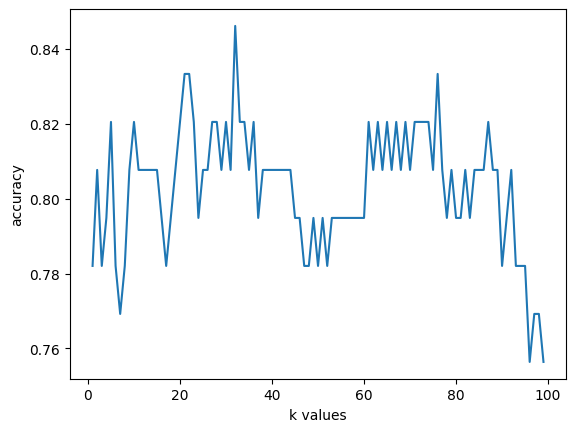

In [49]:
#%% Firstly we should find the best k value for the best predict rate
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))  
    
plt.plot(range(1,100),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [50]:
#%% As we can see; the best value of the k is 32
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(" {} NN score: {}".format(32,knn.score(x_test, y_test)))

 32 NN score: 0.8461538461538461
